In [ ]:
#Análisis Operacional - M/M/1 & M/M/S
#M/M/1:
#M indica que las llegadas siguen un proceso de Poisson.
#M indica que el tiempo de servicio sigue una distribución exponencial.
#1 indica que hay un solo servidor.(Solo hay una caja Abierta)
#M/M/S:SSSS
#imilar al M/M/1, pero S indica que hay S servidores disponibles.

In [37]:
from math import factorial
import pandas as pd
from IPython.display import display, HTML

In [38]:
# Funciones para el modelo M/M/1
def mm1_avg_customers(lam, mu):
    rho = lam / mu
    ls = rho / (1 - rho)
    return ls

def mm1_total_time(lam, mu):
    ws = 1 / (mu - lam)
    return ws

def mm1_system_utilization(lam, mu):
    rho = lam / mu
    return rho

def mm1_avg_waiting_customers(lam, mu):
    lq = lam ** 2 / (mu * (mu - lam))
    return lq

def mm1_empty_system_probability(lam, mu):
    p0 = 1 - lam / mu
    return p0

def mm1_probability_n_customers(lam, mu, n):
    rho = lam / mu
    pn = (1 - rho) * (rho ** n)
    return pn


In [39]:
# Funciones para el modelo M/M/S
def mms_avg_customers(lam, mu, s):
    rho = lam / (s * mu)
    numerador = rho ** s * (1 - rho)
    denominador = factorial(s) * (1 - rho)
    ls = numerador / denominador
    return ls

def mms_avg_time(lam, mu, s):
    ls = mms_avg_customers(lam, mu, s)
    ws = ls / lam
    return ws

def mms_avg_waiting_customers(lam, mu, s):
    lq = mms_avg_customers(lam, mu, s) - lam / mu
    return lq

def mms_empty_system_probability(lam, mu, s):
    rho = lam / (s * mu)
    p0_denom = sum([(rho ** n) / factorial(n) for n in range(s)])
    p0 = 1 / (1 + ((rho ** s) / factorial(s)) * p0_denom)
    return p0

def mms_probability_n_customers(lam, mu, s, n):
    rho = lam / (s * mu)
    if n < s:
        pn = (rho ** n) / factorial(n)
    else:
        pn = (rho ** n) / (factorial(s) * (s ** (n - s)))
    return pn


In [40]:
# Función para solicitar al usuario que ingrese valores
def get_user_input():
    lam = float(input("Ingrese la tasa de llegada (λ): "))
    mu = float(input("Ingrese la tasa de servicio (µ): "))
    s = int(input("Ingrese el número de servidores (s): "))
    return lam, mu, s


In [41]:
def display_result_table(results, model):
    df = pd.DataFrame(data=results.values(), index=results.keys(), columns=["Resultado"])
    print(f"Resultados para el modelo {model}:\n")
    display(df)


In [44]:
import pandas as pd
from IPython.display import display

def main():
    print("Seleccione el modelo:")
    print("1. M/M/1")
    print("2. M/M/S")
    model_choice = int(input("Ingrese el número del modelo que desea utilizar: "))

    if model_choice == 1:
        lam, mu, _ = get_user_input()

        # Calcular todas las métricas
        results = {
            "Número promedio de clientes en el sistema": mm1_avg_customers(lam, mu),
            "Tiempo total en el sistema": mm1_total_time(lam, mu),
            "Utilización del sistema": mm1_system_utilization(lam, mu),
            "Número promedio de clientes en la fila": mm1_avg_waiting_customers(lam, mu),
            "Probabilidad de sistema vacío": mm1_empty_system_probability(lam, mu)
        }

        # Crear DataFrame
        results_df = pd.DataFrame(results, index=["M/M/1"])

        # Mostrar la tabla
        display(results_df)

        # Guardar en Excel
        results_df.to_excel('resultados_modelo.xlsx', index=True)

    elif model_choice == 2:
        lam, mu, s = get_user_input()

        # Calcular todas las métricas
        results = {
            "Número promedio de clientes en el sistema": mms_avg_customers(lam, mu, s),
            "Tiempo promedio en el sistema": mms_avg_time(lam, mu, s),
            "Número promedio de clientes en la fila": mms_avg_waiting_customers(lam, mu, s),
            "Probabilidad de sistema vacío": mms_empty_system_probability(lam, mu, s)
        }

        # Crear DataFrame
        results_df = pd.DataFrame(results, index=["M/M/S"])

        # Mostrar la tabla
        display(results_df)

        # Guardar en Excel
        results_df.to_excel('resultados_modelo.xlsx', index=True)

    else:
        print("Opción no válida")

if __name__ == "__main__":
    main()


Seleccione el modelo:
1. M/M/1
2. M/M/S
Ingrese el número del modelo que desea utilizar: 1
Ingrese la tasa de llegada (λ): 2
Ingrese la tasa de servicio (µ): 3
Ingrese el número de servidores (s): 4


,Número promedio de clientes en el sistema,Tiempo total en el sistema,Utilización del sistema,Número promedio de clientes en la fila,Probabilidad de sistema vacío
M/M/1,2.0,1.0,0.666667,1.333333,0.333333


In [ ]:
#"Estamos monitoriando cómo los clientes se mueven entre diferentes áreas del cine como: 
#"Entrada","Boletería" y "Sala de Proyección". 
#se Registran cada vez que un cliente se desplaza de una área a otra,generando una secuencia de estados como;
#"Entrada", "Boletería", "Sala de Proyección", "Boletería", "Sala de Proyección", "Sala de Proyección", etc.
#Entonces aplicamos este proceso a una cadena de Markov:

#Mapeo de Estados: 
#1. Asignas números a las áreas del cine, por ejemplo, "Entrada"=0.5, "Boletería"=0.25, "Sala de Proyección"=0.25.
#Conteo de Transiciones: 
#2. Contamos cuántas veces un cliente se mueve de un área a otra. 
#Por ejemplo, si hay 3 transiciones de "Entrada" a "Boletería", anotamos ese número.
#3 Probabilidades: se calcula las probabilidades de transición. 
#Si hay 3 transiciones de "Entrada" a "Boletería" y un total de 5 movimientos desde "Entrada", la probabilidad es 3/5.
#Estado Inicial: El último lugar que el cliente visita en tu observación se convierte en el estado inicial para la cadena de Markov. 
#Si la última transición registrada fue de "Sala de Proyección", entonces "Sala de Proyección" sería tu estado inicial.

#Este proceso ayuda a entender cómo los clientes se desplazan dentro del cine y proporciona información para prever futuros movimientos, 
#lo que podría ser útil para optimizar la distribución de servicios y reducir las colas."
#Primera Fila: 0.4 0.3 0.3
#Segunda Fila: 0.2 0.5 0.3
#Tercera Fila: 0.4 0.3 0.3
#estado inicial: 2

In [32]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display, HTML


In [33]:
def matriz_transicion():
    print("Ingrese la matriz de probabilidad de transición (por filas):")
    P = []
    try:
        for i in range(3):
            fila = list(map(float, input(f"Fila {i + 1}: ").split()))
            # Verifica que la fila tenga la misma longitud
            if len(fila) != 3:
                raise ValueError("La fila debe tener 3 elementos.")
            # Verifica que las probabilidades sumen 1
            if not np.isclose(np.sum(fila), 1):
                raise ValueError("Las probabilidades en la fila deben sumar 1.")
            P.append(fila)
    except ValueError as e:
        print(f"Error: {e}")
        return matriz_transicion()
    return np.array(P)


In [34]:
def simular_cadena_markov(P, estado_inicial, periodos):
    estados = [estado_inicial]
    for _ in range(periodos):
        nuevo_estado = np.random.choice(range(len(P)), p=P[estados[-1]])
        estados.append(nuevo_estado)
    return estados

def mostrar_resultados(P, estado_inicial, periodos):
    # Mostrar matriz de probabilidad de transición
    df_prob = pd.DataFrame(P, index=[f'E{i+1}' for i in range(len(P))], columns=[f'E{i+1}' for i in range(len(P))])
    print("\nMatriz de probabilidad de transición:")
    display(df_prob)

    # Crear y mostrar diagrama de transición
    G = nx.DiGraph()
    for i in range(len(P)):
        for j in range(len(P[i])):
            if P[i, j] > 0:
                G.add_edge(f'E{i+1}', f'E{j+1}', weight=P[i, j])
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_size=2000, node_color="skyblue", font_size=10, font_color="black", font_weight="bold", arrowsize=20)
    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    plt.title("Diagrama de Transición")
    plt.show()

    # Mostrar vector de estado inicial
    df_estado_inicial = pd.DataFrame(data=np.zeros(len(P)), index=[f'E{i+1}' for i in range(len(P))], columns=["Valor"])
    df_estado_inicial.iloc[estado_inicial] = 1
    print("\nVector de estado inicial:")
    display(df_estado_inicial)

    # Calcular y mostrar vector para el periodo 2
    resultados_simulacion = simular_cadena_markov(P, estado_inicial, periodos)
    vector_periodo_2 = np.zeros(len(P))
    vector_periodo_2[resultados_simulacion[1]] = 1
    df_vector_periodo_2 = pd.DataFr


Ingrese la matriz de probabilidad de transición (por filas):
Fila 1: 1
Error: La fila debe tener 3 elementos.
Ingrese la matriz de probabilidad de transición (por filas):
Fila 1: 2
Error: La fila debe tener 3 elementos.
Ingrese la matriz de probabilidad de transición (por filas):
Fila 1: 0.1 0.5 0.4
Fila 2: 0.3 0.3 0.4
Fila 3: 0.2 0.2 0.6
Ingrese el estado inicial (1, 2 o 3): 1

Matriz de probabilidad de transición:
[[0.1 0.5 0.4]
 [0.3 0.3 0.4]
 [0.2 0.2 0.6]]


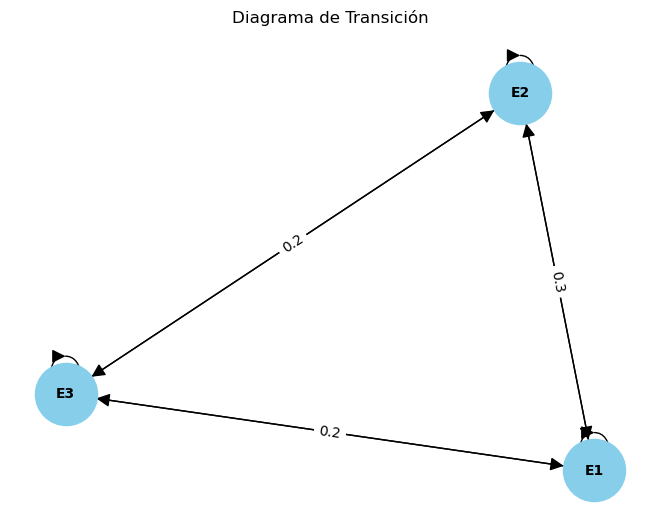


Vector de estado inicial:
E1 -> 1, Resto -> 0

Vector para el periodo 2:
[0. 0. 1.]


,Matriz de Probabilidad de Transición,Vector de Estado Inicial,Vector para el Periodo 2
0,"[[0.1, 0.5, 0.4], [0.3, 0.3, 0.4], [0.2, 0.2, ...","E1 -> 1, Resto -> 0","[0.0, 0.0, 1.0]"


In [47]:
from IPython.display import display

def main():
    # Configuración inicial
    P = matriz_transicion()
    estado_inicial = int(input("Ingrese el estado inicial (1, 2 o 3): ")) - 1  # Ajusta el índice del estado inicial
    periodos = 2  # Siempre calcularemos el vector para el periodo 2

    # Obtener resultados
    resultados = obtener_resultados(P, estado_inicial, periodos)

    # Mostrar resultados como tabla en la consola
    display(resultados)

    # Guardar resultados en Excel
    resultados.to_excel('resultados_matriz.xlsx', index=True)

def obtener_resultados(P, estado_inicial, periodos):
    # Mostrar matriz de probabilidad de transición
    print("\nMatriz de probabilidad de transición:")
    print(P)

    # Crear y mostrar diagrama de transición (opcional)
    G = crear_diagrama_transicion(P)

    # Mostrar vector de estado inicial
    print("\nVector de estado inicial:")
    print(f"E{estado_inicial + 1} -> 1, Resto -> 0")

    # Calcular y mostrar vector para el periodo 2
    resultados_simulacion = simular_cadena_markov(P, estado_inicial, periodos)
    vector_periodo_2 = np.zeros(len(P))
    vector_periodo_2[resultados_simulacion[1]] = 1
    print("\nVector para el periodo 2:")
    print(vector_periodo_2)

    # Crear DataFrame
    resultados_df = pd.DataFrame({
        "Matriz de Probabilidad de Transición": [P],
        "Vector de Estado Inicial": [f"E{estado_inicial + 1} -> 1, Resto -> 0"],
        "Vector para el Periodo 2": [vector_periodo_2]
    })

    return resultados_df

def crear_diagrama_transicion(P):
    # Crear diagrama de transición (opcional)
    G = nx.DiGraph()
    for i in range(len(P)):
        for j in range(len(P[i])):
            if P[i, j] > 0:
                G.add_edge(f'E{i+1}', f'E{j+1}', weight=P[i, j])
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_size=2000, node_color="skyblue", font_size=10, font_color="black", font_weight="bold", arrowsize=20)
    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    plt.title("Diagrama de Transición")
    plt.show()

if __name__ == "__main__":
    main()



In [ ]:
#Metodo de Productos Medios : 
#Se usa para recomendar las peliculas que estan en estreno estas 
#con un numero pseudoaletorio , toma digitos centrales y normaliza 
#calculando el indice y dando una lista de peliculas recomendadas.

In [48]:
import pandas as pd

def productos_medios(seed1, seed2, n, total_peliculas):
    resultados = []

    for _ in range(n):
        # Calcula el siguiente número pseudoaleatorio
        producto = seed1 * seed2
        # Toma los dígitos centrales y normaliza
        numero_pseudoaleatorio = int(str(producto)[len(str(producto)) // 2 - 1: len(str(producto)) // 2 + 1])
        numero_normalizado = numero_pseudoaleatorio / 100.0
        # Calcula el índice de película recomendada
        indice_pelicula = int(numero_normalizado * total_peliculas)

        resultados.append(indice_pelicula)

        # Actualiza las semillas para la siguiente iteración
        seed1, seed2 = seed2, numero_pseudoaleatorio

    return resultados

def main():
    # Solicitar al usuario la lista de películas
    num_peliculas = int(input("Ingrese el número total de películas: "))
    peliculas = [input(f"Ingrese el nombre de la película {i + 1}: ") for i in range(num_peliculas)]

    # Ejemplo con semillas iniciales 23 y 17, generando 5 números pseudoaleatorios
    semilla1 = 23
    semilla2 = 17
    num_resultados = 5

    resultados = productos_medios(semilla1, semilla2, num_resultados, num_peliculas)

    # Mostrar las películas recomendadas en forma de tabla
    df = pd.DataFrame({"Películas Recomendadas": [peliculas[indice] for indice in resultados]})
    display(df)

    # Guardar en Excel
    df.to_excel('peliculas_recomendadas.xlsx', index=False)

if __name__ == "__main__":
    main()


Ingrese el número total de películas: 2
Ingrese el nombre de la película 1: The Marvel
Ingrese el nombre de la película 2: Wonka


,Películas Recomendadas
0,The Marvel
1,Wonka
2,Wonka
3,Wonka
4,The Marvel


In [ ]:
#Métodos Congruenciales MIXTO
#se usa como base para dar al cliente la opcion de sentarse en algun asiento ya que algunas entradas estan ya vendidas
#los asientos los cuales se llaman Vc ya que los otros sientos estan  ya ocupados de igual forma el cliente puede decidir en 
#cual asiento quiere estar.


In [49]:
pip install colorama

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [63]:
import random
from colorama import init, Fore
import pandas as pd

init(autoreset=True)  # Inicializar colorama

def congruential_mix(seed, a, c, m, num_randoms):
    random_sequence = [seed]
    for _ in range(num_randoms):
        next_random = (a * random_sequence[-1] + c) % m
        random_sequence.append(next_random)
    return random_sequence[1:]  # Excluir la semilla inicial

def generar_matriz_asientos(filas, columnas):
    matriz = [['[ {} ]'.format(chr(65 + j) + str(i + 1)) for j in range(columnas)] for i in range(filas)]

    # Modificar la representación para que se parezca a un tablero de ajedrez
    for i in range(filas):
        for j in range(columnas):
            if (i + j) % 2 == 1:
                matriz[i][j] = '[ VC ]' if '[ E' not in matriz[i][j] else '[ VC ]'

    return matriz

def mostrar_matriz_asientos(matriz):
    # Imprimir números de columna
    print("   " + " ".join(str(i + 1) for i in range(len(matriz[0]))))
    for i, fila in enumerate(matriz):
        # Imprimir letra de fila y asientos
        print(chr(65 + i) + " " + " ".join(Fore.RED + str(asiento) + Fore.RESET if '[ E' in asiento else str(asiento) for asiento in fila))

def asignar_asiento(matriz, fila, columna, espectador):
    matriz[fila][columna] = f'[ {espectador} ]'

def seleccionar_asientos_manual(matriz, num_asientos, secuencia_aleatoria):
    asientos_seleccionados = []
    for _ in range(num_asientos):
        while True:
            print("\nSeleccione asiento para el próximo espectador:")
            mostrar_matriz_asientos(matriz)
            input_fila_columna = input("Ingrese el número de fila y columna (por ejemplo, '1 2'): ")
            
            try:
                # Dividir la entrada en fila y columna
                fila, columna = map(int, input_fila_columna.split())
                fila -= 1  # Ajustar el índice de la fila
                columna -= 1  # Ajustar el índice de la columna

                if 0 <= fila < len(matriz) and 0 <= columna < len(matriz[0]):
                    if '[ E' not in matriz[fila][columna]:
                        break
                    else:
                        print("¡El asiento ya está ocupado!")
                        opcion = input("¿Desea ingresar otro asiento? (Sí/No): ").lower()
                        if opcion != 'si':
                            return asientos_seleccionados
                else:
                    print("¡Número de fila o columna fuera de rango! Inténtelo de nuevo.")

            except ValueError:
                print("Error: Ingrese dos números separados por un espacio.")

        asientos_seleccionados.append((fila, columna))
        asignar_asiento(matriz, fila, columna, f"E{len(asientos_seleccionados)}")

    return asientos_seleccionados

# Ejemplo de uso
num_filas = 5
num_columnas = 5

matriz_asientos = generar_matriz_asientos(num_filas, num_columnas)

# Se utiliza el método congruencial para generar una secuencia pseudoaleatoria
secuencia_aleatoria = congruential_mix(123, 5, 7, 50, num_filas * num_columnas)

num_espectadores = int(input("Ingrese la cantidad de espectadores: "))
asientos_seleccionados = seleccionar_asientos_manual(matriz_asientos, num_espectadores, secuencia_aleatoria)

# Crear DataFrame con los asientos seleccionados
data = {"Espectador": [f"Espectador {i+1}" for i in range(len(asientos_seleccionados))],
        "Fila": [chr(65 + fila) for fila, _ in asientos_seleccionados],
        "Columna": [columna + 1 for _, columna in asientos_seleccionados]}

df_asientos = pd.DataFrame(data)

# Mostrar el DataFrame
print("\nAsientos Seleccionados:")
print(df_asientos)

# Mostrar la matriz de asientos después de la asignación
print("\nMatriz de Asientos después de la asignación:")
mostrar_matriz_asientos(matriz_asientos)

# Guardar el DataFrame en un archivo Excel
df_asientos.to_excel('asientos_seleccionados.xlsx', index=False)


Ingrese la cantidad de espectadores: 1

Seleccione asiento para el próximo espectador:
   1 2 3 4 5
A [ A1 ] [ VC ] [ C1 ] [ VC ] [ E1 ]
B [ VC ] [ B2 ] [ VC ] [ D2 ] [ VC ]
C [ A3 ] [ VC ] [ C3 ] [ VC ] [ E3 ]
D [ VC ] [ B4 ] [ VC ] [ D4 ] [ VC ]
E [ A5 ] [ VC ] [ C5 ] [ VC ] [ E5 ]
Ingrese el número de fila y columna (por ejemplo, '1 2'): 1
Error: Ingrese dos números separados por un espacio.

Seleccione asiento para el próximo espectador:
   1 2 3 4 5
A [ A1 ] [ VC ] [ C1 ] [ VC ] [ E1 ]
B [ VC ] [ B2 ] [ VC ] [ D2 ] [ VC ]
C [ A3 ] [ VC ] [ C3 ] [ VC ] [ E3 ]
D [ VC ] [ B4 ] [ VC ] [ D4 ] [ VC ]
E [ A5 ] [ VC ] [ C5 ] [ VC ] [ E5 ]
Ingrese el número de fila y columna (por ejemplo, '1 2'): 2
Error: Ingrese dos números separados por un espacio.

Seleccione asiento para el próximo espectador:
   1 2 3 4 5
A [ A1 ] [ VC ] [ C1 ] [ VC ] [ E1 ]
B [ VC ] [ B2 ] [ VC ] [ D2 ] [ VC ]
C [ A3 ] [ VC ] [ C3 ] [ VC ] [ E3 ]
D [ VC ] [ B4 ] [ VC ] [ D4 ] [ VC ]
E [ A5 ] [ VC ] [ C5 ] [ VC ] [ E5

In [ ]:
#Prueba de Kolmogorov-Smirnov

In [ ]:
#Importar bibliotecas:
#from scipy.stats import kstest: Importa la función kstest de la biblioteca scipy.stats para realizar la prueba de Kolmogorov-Smirnov.
#import numpy as np: Importa la biblioteca numpy como np para manipulación de arreglos y cálculos numéricos.

In [64]:
pip install scipy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [ ]:
#Ejemplo de Uso:
#Supongamos que tenemos una muestra de tiempos de duración de películas en minutos y deseas verificar si estos 
#tiempos siguen una distribución uniforme.
#Ingresamos los datos separados por espacios: 120 110 130 115 125
#Ingresamos el nivel de significancia (por ejemplo, 0.05): 0.05
#El código calculará la estadística de prueba D, realizará la prueba de hipótesis y te informará si puedes o no rechazar 
#la hipótesis nula de que los tiempos de duración siguen una distribución uniforme, con un nivel de significancia del 0.05.

In [66]:
from scipy.stats import kstest
import numpy as np
import pandas as pd

def kolmogorov_smirnov_test(data):
    # Ordenar los datos
    sorted_data = np.sort(data)
    
    # Calcular la función de distribución acumulativa empírica (Sn(x))
    empirical_cdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
    
    # Calcular la estadística de prueba D
    D_plus = np.max(empirical_cdf - sorted_data)
    D_minus = np.max(sorted_data - (empirical_cdf - 1/len(sorted_data)))
    D = max(D_plus, D_minus)
    
    return D

# Obtener datos del usuario
user_data = input("Ingrese los datos separados por espacios: ")
data = np.array([float(x) for x in user_data.split()])

# Obtener el nivel de significancia del usuario
alpha = float(input("Ingrese el nivel de significancia (por ejemplo, 0.05): "))

# Realizar la prueba de Kolmogorov-Smirnov
D_statistic = kolmogorov_smirnov_test(data)

# Realizar la prueba de hipótesis
result, p_value = kstest(data, 'uniform')

# Crear DataFrame con los resultados
results_df = pd.DataFrame({
    "Estadística de prueba D": [D_statistic],
    "P-valor": [p_value],
    "Nivel de significancia": [alpha],
    "Hipótesis nula rechazada": [p_value <= alpha]
})

# Mostrar el DataFrame como tabla en Jupyter
display(results_df)

# Guardar el DataFrame en un archivo Excel
results_df.to_excel('resultados_kstest.xlsx', index=False)


Ingrese los datos separados por espacios: 1 2 
Ingrese el nivel de significancia (por ejemplo, 0.05): 0.5


,Estadística de prueba D,P-valor,Nivel de significancia,Hipótesis nula rechazada
0,1.5,0.0,0.5,True


In [ ]:
#Prueba Chi2
#ingresar_datos(): Esta función solicita al 
#usuario ingresar el número de categorías para género y número de boletos, y 
#luego recoge los datos específicos para cada combinación de categorías.

#realizar_prueba_chi2(data): Esta función toma los datos ingresados, 
#calcula los grados de libertad, realiza la prueba de Chi² y muestra los resultados, 
#incluyendo si se debe aceptar o rechazar la hipótesis nula, el estadístico Chi², el valor crítico de Chi² y el p-valor.

In [67]:
import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency

def ingresar_datos():
    num_generos = int(input("Ingrese el número de categorías para género: "))
    num_boletos = int(input("Ingrese el número de categorías para número de boletos: "))

    data = np.zeros((num_generos, num_boletos), dtype=int)

    for i in range(num_generos):
        for j in range(num_boletos):
            mensaje = f"Ingrese el número de clientes para {i+1}ª categoría de género y {j+1}ª categoría de boletos: "
            data[i, j] = int(input(mensaje))

    return data

def realizar_prueba_chi2(data):
    degrees_of_freedom = (data.shape[0] - 1) * (data.shape[1] - 1)

    chi2_stat, p_value, _, _ = chi2_contingency(data)

    critical_value = chi2_contingency(np.ones_like(data))[0]

    reject_null = chi2_stat > critical_value

    # Crear DataFrame con los resultados
    results_df = pd.DataFrame({
        "Hipótesis nula rechazada": [reject_null],
        "Chi² Estadístico": [chi2_stat],
        "Valor Crítico de Chi²": [critical_value],
        "P-valor": [p_value],
        "Grados de Libertad": [degrees_of_freedom]
    })

    # Mostrar el DataFrame como tabla en Jupyter
    display(results_df)

    # Guardar el DataFrame en un archivo Excel
    results_df.to_excel('resultados_chi2.xlsx', index=False)

if __name__ == "__main__":
    datos = ingresar_datos()

    realizar_prueba_chi2(datos)


Ingrese el número de categorías para género: 2
Ingrese el número de categorías para número de boletos: 3
Ingrese el número de clientes para 1ª categoría de género y 1ª categoría de boletos: 1
Ingrese el número de clientes para 1ª categoría de género y 2ª categoría de boletos: 2
Ingrese el número de clientes para 1ª categoría de género y 3ª categoría de boletos: 3
Ingrese el número de clientes para 2ª categoría de género y 1ª categoría de boletos: 4
Ingrese el número de clientes para 2ª categoría de género y 2ª categoría de boletos: 32
Ingrese el número de clientes para 2ª categoría de género y 3ª categoría de boletos: 5


,Hipótesis nula rechazada,Chi² Estadístico,Valor Crítico de Chi²,P-valor,Grados de Libertad
0,True,6.076453,0.0,0.04792,2
